- https://www.tensorflow.org/api_docs/python/tf

## step 1. 데이터 준비

In [1]:
# import 
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt #시각화

In [2]:
# dataset 로드 

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
train_labels[0]

5

In [6]:
test_images.shape

(10000, 28, 28)

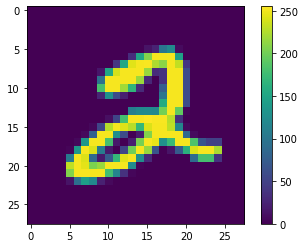

In [7]:
# 데이터 보여주기
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

## step 2. 전처리

In [8]:
# 1. image data(28 * 28)를 1차원 텐서로 변환\
# reshape 을 이용하여 변경, why? Dense Layer 규칙 : 증명하려는 데이터가 1차원 데이터이어야 한다.(flatten)

In [9]:
train_images = train_images.reshape(60000, 28 * 28)
test_images = test_images.reshape(10000, 28 * 28)

In [10]:
# Label Encoding
# 0 : [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# 1 : [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
# .
# .
# .
# 9 : [1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

One-Hot Encoding

객체들을 Index를 주는 것이 아닌, 표로 만들어 각 카테고리에 해당하는 객체에게 1의 값을, 아닌 객체에게는 0의 값을 줌
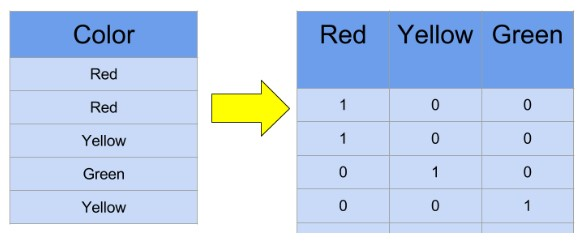


반드시 바꿔야 하는 것은 아님
하지만 문자는 안됨..

In [11]:
train_labels.shape

(60000, 10)

In [12]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## step 3. 모델 만들기


In [13]:
from tensorflow.keras import models, layers

In [14]:
model = models.Sequential()
# model.add(layers.Input(Shape=(28*28, )))
# model.add(layers.Flatten(28, 28))
# model.add(layers.Flatten())
model.add(layers.Dense(units=512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(units=10, activation='softmax'))
# 0~9 분류 10, 확률값

SoftMax = 확률값으로 만들어 줌

Flatten = Denes Layer 사용 할 때 사용
          reshape - 1차원으로 변경
          만약 reshape을 사용하지 않고 돌렸을 경우, Flatten을 하면 된다.

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## step 4. 손실함수, 옵티마이저, 성능지표 선택

In [16]:
model.compile(optimizer='rmsprop', # 경사하강법
              loss='categorical_crossentropy', #오차 구하는 함수
              metrics=['accuracy']) # 평가 지표

categorical = 예측값이 확률로 나올 때 사용
categorical_crossentropy = 예측값으로 나오면서, one-hot Encoding 일 경우
                           만약 One-hot Encoding이 아닐 경우 실행 안됨

## step 5. fit

In [17]:
# fit은 훈련하는 것
history = model.fit(train_images, train_labels,  # x, y
                    epochs=30,                   # 전체 샘플이 반복되는 수 (60000건을 30번 훈련)
                    batch_size=128,              # 60000건이 훈련 할 때, 주어진 사이즈(128개)만큼 들어간다. 128개가 들어간 후 예측값이 나오고, 오차 계산 후,
                                                 # 오차가 w에 영향을 주고(Optimize), 128개의 loss의 평균을 구해 영향도를 분석하여 평가 지표를 구함
                                                 # 보통은 속도때문이지만, 에러값의 영향도를 낮추기도 함
                                                 # 60000/128 = 375 Step수 만큼 w와 bias를 업데이트 함
                    validation_split=0.2)        # 60000건 중에서 0.2% 검증에 사용함
                                                 # Testing 데이터가 이상할 경우 Validate를 통해 얼마만큼의 성능이 나오는지 확인함
                                                 # 한 Epoch이 끝날 때 Validate를 진행함 (여기선 총 30회 진행함)
                                                 # 1. OverFitting 확인 용도 2. Tuning 하는 용도로 사용
                                                 # loss와 accuracy는 훈련 데이터의 값
                                                 # val_loss와 val_accuracy Epoch이 끝난 후 Validate Set을 이용하여 예측하였을 때의 진행 값
                                                 # loss값이 그냥 훈련 한 값인지 외운 값인지 확인하기 위해 val_loss랑 비교함

Epoch 1/30
375/375 [==============================] - 8s 3ms/step - loss: 6.9902 - accuracy: 0.8889 - val_loss: 1.1028 - val_accuracy: 0.9449
Epoch 2/30
375/375 [==============================] - 1s 3ms/step - loss: 0.9289 - accuracy: 0.9509 - val_loss: 1.1936 - val_accuracy: 0.9438
Epoch 3/30
375/375 [==============================] - 1s 3ms/step - loss: 0.6140 - accuracy: 0.9648 - val_loss: 0.9225 - val_accuracy: 0.9576
Epoch 4/30
375/375 [==============================] - 1s 3ms/step - loss: 0.4376 - accuracy: 0.9713 - val_loss: 0.8413 - val_accuracy: 0.9602
Epoch 5/30
375/375 [==============================] - 1s 3ms/step - loss: 0.3730 - accuracy: 0.9759 - val_loss: 0.8697 - val_accuracy: 0.9666
Epoch 6/30
375/375 [==============================] - 1s 3ms/step - loss: 0.3186 - accuracy: 0.9791 - val_loss: 0.9264 - val_accuracy: 0.9618
Epoch 7/30
375/375 [==============================] - 1s 3ms/step - loss: 0.2878 - accuracy: 0.9819 - val_loss: 1.0492 - val_accuracy: 0.9634
Epoch 

## step 6. 훈련과정 시각화

In [18]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [19]:
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))

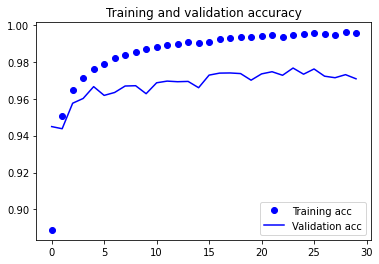

In [20]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

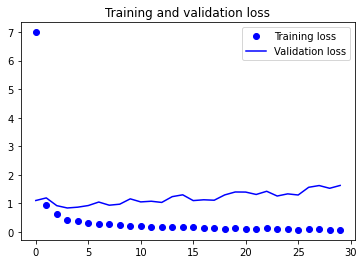

In [21]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## step 7. 평가

In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 1.1870 - accuracy: 0.9746


## step 8. 예측하기

In [23]:
import numpy as np

In [24]:
predict = model.predict(test_images[0].reshape(1, 784))

print("predict probability:", predict)  
print('predict number:', np.argmax(predict))

1/1 [==============================] - 0s 115ms/step
predict probability: [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
predict number: 7


In [25]:
np.max(predict)

1.0

In [26]:
np.argmax(test_labels[0])

7

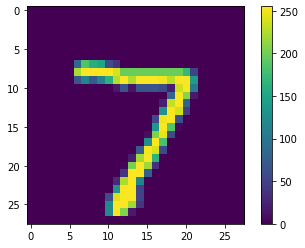

In [27]:
# 데이터 보여주기
plt.figure()
plt.imshow(test_images[0].reshape(28, 28))
plt.colorbar()
plt.grid(False)
plt.show()

In [28]:
predict = model.predict(test_images[-1].reshape(1, 784)) #len(test_images) - 1

print("predict probability:", predict)  
print('predict number:', np.argmax(predict))

1/1 [==============================] - 0s 31ms/step
predict probability: [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
predict number: 6


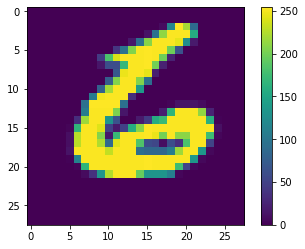

In [29]:
# 데이터 보여주기
plt.figure()
plt.imshow(test_images[-1].reshape(28, 28))
plt.colorbar()
plt.grid(False)
plt.show()